# general info o gtfs
| Nazwa pliku    | Wymagany           | Określa                                                                                                                                                                                             |
|----------------|--------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| agency.txt     | Wymagane           | Przewoźnicy z usługą świadczoną w tym zbiorze danych.                                                                                                                                               |
| stops.txt      | Wymagane           | Zatrzymuje się, tam gdzie pasażerowie wsiądą lub wysiądą z pojazdu. Definiuje również stacje i wejścia do stacji.                                                                                   |
| routes.txt     | Wymagane           | Trasy dojazdu transportem publicznym. Trasa to grupa podróży wyświetlanych pasażerom w ramach jednej usługi.                                                                                        |
| trips.txt      | Wymagane           | Podróże na każdej trasie. Podróż to sekwencja co najmniej 2 przesiadek w określonym czasie.                                                                                                         |
| stop_times.txt | Wymagane           | Godziny przyjazdu i odjazdu pojazdu.                                                                                                                                                                |
| calendar.txt   | Wymagane warunkowo | Daty świadczenia usługi określone w harmonogramie tygodniowym z datami rozpoczęcia i zakończenia. Ten plik jest wymagany, chyba że w calendar_dates.txt zostały zdefiniowane wszystkie daty usługi. |

# Agency


| Nazwa pola      | Typ             | Wymagany           | Opis                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
|-----------------|-----------------|--------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| agency_id       | Identyfikator   | Wymagane warunkowo | Wskazuje markę transportu publicznego, która jest często synonimem danego przewoźnika. Pamiętaj, że w niektórych przypadkach, np. gdy jedna agencja prowadzi kilka odrębnych usług, agencje i marki są różne. W tym dokumencie zamiast słowa „marka” używa się określenia „agencja”. Zbiór danych może zawierać dane od wielu agencji. To pole jest wymagane, jeśli zbiór danych zawiera dane wielu przewoźników. W przeciwnym razie jest opcjonalne. |
| agency_name     | Tekst           | Wymagane           | Pełna nazwa przewoźnika.                                                                                                                                                                                                                                                                                                                                                                                                                              |
| agency_url      | URL             | Wymagane           | Adres URL przewoźnika.                                                                                                                                                                                                                                                                                                                                                                                                                                |
| agency_timezone | Strefa czasowa  | Wymagane           | Strefa czasowa przewoźnika. Jeśli w zbiorze danych wskazano wiele agencji, każda z nich musi mieć tę samą wartość agency_timezone.                                                                                                                                                                                                                                                                                                                    |                                                                                                                                                                                                                           |

In [165]:
agency_df.columns

Index(['agency_id', 'agency_name', 'agency_url', 'agency_timezone'], dtype='object')

# Stops

| Nazwa pola          | Typ                                             | Wymagany           | Opis                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
|---------------------|-------------------------------------------------|--------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| stop_id             | Identyfikator                                   | Wymagane           | Wskazuje przystanek, stację lub przystanek.  Termin „wejście do stacji” odnosi się zarówno do wejścia na stację, jak i wyjścia do niej. Przystanki, stacje lub wejścia na stację są wspólnie nazywane lokalizacjami. Z tego samego przystanku może korzystać wiele tras.                                                                                                                                                           |
| stop_name           | Tekst                                           | Wymagane warunkowo | Nazwa lokalizacji. Użyj nazwy, która będzie zrozumiała dla lokalnego i turystycznego terminu.  Jeśli lokalizacja to miejsce wejścia na pokład (location_type=4), stop_name powinien zawierać nazwę pokładu, którą wyświetla agencja. Może to być tylko jedna litera (na przykład w przypadku niektórych europejskich stacji międzymiastowych) lub tekst „Wjazd na wózek inwalidzki” (Nowy Jork) lub „Nagłówek krótkich pociągów” (Paryż – RER).  Wymagany warunkowo: • Wymagany w przypadku lokalizacji przystanków (location_type=0), stacji (location_type=1) lub wejścia/wyjścia (location_type=2). • Opcjonalny w przypadku lokalizacji będących ogólnymi węzłami (location_type=3).location_type=4                                                                                                                                                                                                                                            |
| stop_lat            | Szerokość geograficzna                          | Wymagane warunkowo | Szerokość geograficzna lokalizacji.  Wymagane warunkowo: • Wymagane w przypadku lokalizacji przystanków (location_type=0), stacji (location_type=1) lub wejść/wyjścia (location_type=2). • Opcjonalne w przypadku lokalizacji, które są węzłami ogólnymi (location_type=3) lub obszarami wejścia (location_type=4).                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| stop_lon            | Długość geograficzna                            | Wymagane warunkowo | Długość geograficzna lokalizacji    location_type=0location_type=1location_type=2location_type=3location_type=4                                                                                                                                                                                                                                                                                                                                                                               |
| wheelchair_boarding | Enum                                            | Opcjonalnie        | Wskazuje, czy z danej lokalizacji można wjechać na wózek inwalidzki. Prawidłowe opcje to:  W przypadku postojów bez elementu nadrzędnego: 0 lub puste – brak informacji o przystankach. 1 – w przypadku niektórych pojazdów z tego przystanku może wsiąść się na wózku inwalidzkim. 2 – w tym miejscu nie można wejść na wózek inwalidzki.  W przypadku stacji podrzędnych: 0 lub pusta – element odziedziczy zachowanie wheelchair_boarding ze stacji nadrzędnej, jeśli została określona w nadrzędnej sekcji. 1 – dostępna jest dostępna ścieżka ze stacji lub przystanku spoza stacji. 2 – nie ma dostępnej ścieżki spoza stacji do konkretnego przystanku/platformy.  Wejścia/wyjścia: 0 lub puste – wejście w danym miejscu odziedziczy zachowanie stacji wheelchair_boarding zgodnie z ustawieniem nadrzędnym. 1 – wejście na stację jest dostępne dla niepełnosprawnych. 2 – nie ma dostępnej ścieżki dojazdowej ze stacji lub przystanków. |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |

In [166]:
stops_df.columns

Index(['stop_id', 'stop_name', 'stop_lat', 'stop_lon', 'wheelchair_boarding'], dtype='object')

# Routes

| Nazwa pola          | Typ                                              | Wymagany           | Opis                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
|---------------------|--------------------------------------------------|--------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| route_id            | Identyfikator                                    | Wymagane           | Określa trasę.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| agency_id           | Identyfikator odnoszący się do: agency.agency_id | Wymagane warunkowo | Agencja w przypadku określonej trasy. To pole jest wymagane, jeśli zbiór danych dostarcza trasy z więcej niż 1 agencji w agency.txt. W przeciwnym razie jest opcjonalne.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| route_short_name    | Tekst                                            | Wymagane warunkowo | Krótka nazwa trasy. Często jest to krótki, abstrakcyjny identyfikator, taki jak „32”, „100X” lub „zielony”, który pasażerowie używają do identyfikowania trasy, ale bez podawania tego, gdzie są. Należy określić właściwość route_short_name lub route_long_name, a w razie potrzeby także obie.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| route_long_name     | Tekst                                            | Wymagane warunkowo | Pełna nazwa trasy. Ta nazwa jest zwykle bardziej opisowa niż route_short_name i często zawiera miejsce docelowe trasy lub przystanek. Należy określić właściwość route_short_name lub route_long_name, a w razie potrzeby także obie.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| route_type          | Enum                                             | Wymagane           | Wskazuje rodzaj transportu użytego na trasie. Prawidłowe opcje to:  0 – tramwaj, tramwaj, kolej miejska. Dowolny system kolei miejskiej lub ulicznej w obszarze miejskim. 1 – Metro, metro. Dowolny system kolei podziemnej w obszarze miejskim. 2 – kolej. Służy do podróży międzymiastowych i dalekich. 3 – autobus. Używane w przypadku krótkich i długich tras autobusowych. 4 – prom. Służy do obsługi krótkich i długometrażowych łodzi. 5 – tramwaj linowy. Opcja używana w przypadku tramwajów kolejowych na poziomie ulicy, pod którymi biegnie kabel pod pojazdem, np. kolejka linowa w San Francisco. 6 – kolejka linowa, kolejka linowa (np. kolejka gondolowa, kolejka linowa). Transport kablowy, w którym domki, samochody, gondole lub otwarte krzesła są zawieszone za pomocą co najmniej jednego kabla. 7 – kolej linowo-terenowa. Dowolny system kolei przeznaczony do stromych podjazdów. 11 – Trolejbus. Autobusy elektryczne czerpiące energię z przewodowych przewodów za pomocą masztów. 12 – Monorail. Tor, na którym tor składa się z 1 szyny lub belki. |

In [168]:
routes_df.columns

Index(['route_id', 'agency_id', 'route_short_name', 'route_long_name',
       'route_type'],
      dtype='object')

# Trips

| Nazwa pola            | Typ                                                                                       | Wymagany           | Opis                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
|-----------------------|-------------------------------------------------------------------------------------------|--------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| route_id              | Identyfikator odnoszący się do: routes.route_id                                           | Wymagane           | Określa trasę.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| service_id            | Identyfikator odnoszący się do elementu calendar.service_id lub calendar_dates.service_id | Wymagane           | Określa zakres dat, w których usługa jest dostępna dla jednej lub większej liczby tras.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| trip_id               | Identyfikator                                                                             | Wymagane           | Określa podróż.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| wheelchair_accessible | Enum                                                                                      | Opcjonalnie        | Wskazuje dostępność dla osób na wózkach inwalidzkich. Prawidłowe opcje to:  0 lub pusta – brak informacji o dostępności dla danej podróży. 1 – pojazd używany podczas tej podróży może pomieścić co najmniej 1 pasażera. 2 – w trakcie tej podróży nie można jechać na wózku inwalidzkim.                                                                                                                                                                                                                                                                                                         |

In [169]:
trips_df.columns

Index(['route_id', 'service_id', 'trip_id', 'wheelchair_accessible'], dtype='object')

# Stoptimes

| Nazwa pola          | Typ                                             | Wymagany           | Opis                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
|---------------------|-------------------------------------------------|--------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| trip_id             | Identyfikator odnoszący się do: trips.trip_id   | Wymagane           | Określa podróż.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| arrival_time        | Godzina                                         | Wymagane warunkowo | Godzina przyjazdu w określonym miejscu na trasie konkretnego przejazdu. Jeśli nie ma różnych godzin przyjazdu i odjazdu, wpisz tę samą wartość w polach arrival_time i departure_time. W przypadku godzin przypadających po północy w dniu świadczenia usługi jako godzinę wpisz godzinę większą niż 24:00:00 w dniu, w którym zaczyna się harmonogram podróży.  Zaplanowane zatrzymania, podczas których pojazd ściśle przestrzega określonych godzin przyjazdu i odjazdu, są określone w punktach czasowych. Jeśli nie jest to punkt czasu, zalecamy podanie szacowanego czasu lub interpolacji. Jeśli ta opcja jest niedostępna, pole arrival_time może pozostać puste. Zaznacz też, że czas interpolowany jest podany jako timepoint=0. Jeśli interpolacja czasu jest oznaczona znacznikiem timepoint=0, punkty czasowe muszą być oznaczone wartością timepoint=1. Podaj czas przyjazdu dla wszystkich przystanków w czasie. Musisz określić godzinę przyjazdu dla pierwszego i ostatniego przystanku w podróży. |
| departure_time      | Godzina                                         | Wymagane warunkowo | Czas odjazdu z określonej przystanku na trasie. W przypadku godzin następujących po północy w dniu świadczenia usługi jako godzinę przypadającą w dniu, w którym zaczyna się harmonogram, podaj godzinę jako godzinę późniejszą niż 24:00:00 czasu lokalnego. Jeśli nie ma różnych godzin przyjazdu i odjazdu, wpisz tę samą wartość w polach arrival_time i departure_time. Więcej informacji o prawidłowym korzystaniu z punktów czasowych znajdziesz w opisie arrival_time.  Pole departure_time powinno zawierać wartości czasu, o ile są możliwe, w tym wartości niepowiązane lub szacowane między przedziałami czasu.                                                                                                                                                                                                                                                                                                                                                                                          |
| stop_id             | Identyfikator odnoszący się do: stops.stop_id   | Wymagane           | Określa obsługiwany postój. Wszystkie przystanki obsługiwane podczas podróży muszą mieć rekord w stop_times.txt. Wskazane miejsca nie mogą się znajdować na przystanku, a nie na stacji lub przy wejściu do niej. W ramach tej samej podróży postój może być obsługiwany wiele razy, a wiele podróży i tras może odbywać się w tym samym przystanku.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| stop_sequence       | Nieujemna liczba całkowita                      | Wymagane           | Kolejność przystanków w przypadku danej podróży. Wartości muszą zwiększać się wzdłuż podróży, ale nie muszą być następujące po sobie. Przykład: pierwsza lokalizacja podróży może mieć wartość stop_sequence=1, druga lokalizacja podróży może mieć wartość stop_sequence=23, trzecia lokalizacja może mieć wartość stop_sequence=40 itd.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |

In [171]:
stop_times_df.columns

Index(['trip_id', 'arrival_time', 'departure_time', 'stop_id',
       'stop_sequence'],
      dtype='object')

# Calendar

| Nazwa pola | Typ           | Wymagany | Opis                                                                                                                                                                                                                                                                                                                                                                |
|------------|---------------|----------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| service_id | Identyfikator | Wymagane | Jednoznacznie określa zestaw dat, kiedy usługa jest dostępna dla jednej lub większej liczby tras. Każda wartość service_id może występować w pliku calendar.txt najwyżej raz.                                                                                                                                                                                       |
| monday     | Enum          | Wymagane | Wskazuje, czy usługa jest aktywna we wszystkie poniedziałki w zakresie dat określonym w polach start_date i end_date. Pamiętaj, że wyjątki dla określonych dat mogą być wymienione w sekcji calendar_dates.txt. Prawidłowe opcje to:  1 – usługa jest dostępna we wszystkie poniedziałki w zakresie dat. 0 – usługa jest niedostępna w poniedziałki w zakresie dat. |
| tuesday    | Enum          | Wymagane | Działa tak samo jak monday, z wyjątkiem wtorków                                                                                                                                                                                                                                                                                                                     |
| wednesday  | Enum          | Wymagane | Funkcje działające tak samo jak w monday z wyjątkiem środów                                                                                                                                                                                                                                                                                                         |
| thursday   | Enum          | Wymagane | Funkcje podobne do monday, z wyjątkiem czwartków                                                                                                                                                                                                                                                                                                                    |
| friday     | Enum          | Wymagane | Działa tak samo jak monday, z wyjątkiem piątków                                                                                                                                                                                                                                                                                                                     |
| saturday   | Enum          | Wymagane | Działa tak samo jak monday, z wyjątkiem sobót.                                                                                                                                                                                                                                                                                                                      |
| sunday     | Enum          | Wymagane | Działa tak samo jak monday, z wyjątkiem niedziel.                                                                                                                                                                                                                                                                                                                   |
| start_date | Data          | Wymagane | Początek dnia obsługi przedziału czasu usług.                                                                                                                                                                                                                                                                                                                       |
| end_date   | Data          | Wymagane | Zakończenie obsługi w danym przedziale czasu. Ten dzień usługi jest uwzględniony w przedziale.                                                                                                                                                                                                                                                                      |

In [71]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [46]:
directory = "dane/gtfs-drive/"
filepath = directory + "2023-06-15" # konkretny plik wybieramy
filepath += ".gtfs"

In [81]:
import os
files = os.listdir(directory)
lengths = []
for file in files:
    lengths += [pd.read_csv(directory+file+'/stop_times.txt').shape[0]]

In [82]:
for i in range(len(files)):
    files[i] = [datetime.strptime(files[i][0:10], "%Y-%m-%d").date(), files[i][10:]]
files = np.asarray(files)

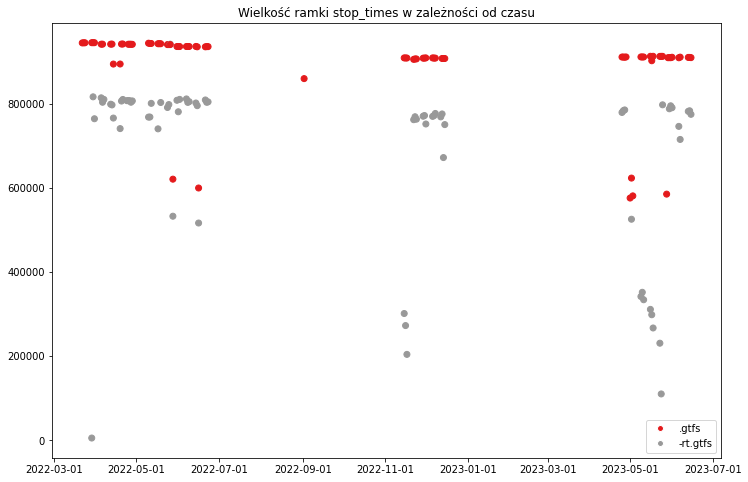

In [163]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,8)
locator = mdates.AutoDateLocator(interval_multiples=True)  # Adjust the interval as needed
plt.gca().xaxis.set_major_locator(locator)
formatter = mdates.DateFormatter("%Y-%m-%d")  # Customize the date format
plt.gca().xaxis.set_major_formatter(formatter)
scatter = ax.scatter(files[...,0], lengths, c = [0 if f == '.gtfs' else 1 if f == '-rt.gtfs' else 2 for f in files[..., 1]], cmap = 'Set1')
plt.title("Wielkość ramki stop_times w zależności od czasu")
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=[0.89411765, 0.10196078, 0.10980392, 1.], label='.gtfs'), plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=[0.6       , 0.6       , 0.6       , 1.        ], label='-rt.gtfs')]

# Add a legend to the plot
ax.legend(handles=legend_handles)
plt.show()

In [30]:
agency_df = pd.read_csv(filepath + "/agency.txt")
calendar_df = pd.read_csv(filepath + "/calendar.txt")
routes_df = pd.read_csv(filepath + "/routes.txt")
stop_times_df = pd.read_csv(filepath + "/stop_times.txt")
stops_df = pd.read_csv(filepath + "/stops.txt")
timetables_df = pd.read_csv(filepath + "/timetables.txt", header = None)
trips_df = pd.read_csv(filepath + "/trips.txt")

C:\Users\mipec\AppData\Local\Temp\ipykernel_27756\3790919082.py:6: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  timetables_df = pd.read_csv(filepath + "/timetables.txt", header = None)


In [34]:
agency_df

,agency_id,agency_name,agency_url,agency_timezone
0,ZTM,Zarz�d Transportu Miejskiego,http://www.ztm.waw.pl,Europe/Warsaw


In [37]:
calendar_df

,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,1,1,1,1,1,1,1,1,20230615,20230615


In [39]:
routes_df.head()

,route_id,agency_id,route_short_name,route_long_name,route_type
0,1,ZTM,1,Annopol,0
1,2,ZTM,102,PKP Olszynka Grochowska,3
2,3,ZTM,103,Dw.Zachodni (Tunelowa),3
3,4,ZTM,104,Metro Bródno,3
4,5,ZTM,105,rondo Daszyńskiego,3


In [40]:
stop_times_df.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence
0,1_020_1_0338,03:55:00,03:55:00,7091_07,1
1,1_020_1_0338,03:56:00,03:56:00,7081_03,2
2,1_020_1_0338,03:58:00,03:58:00,7019_07,3
3,1_020_1_0338,04:00:00,04:00:00,7054_05,4
4,1_020_1_0338,04:01:00,04:01:00,7055_03,5


In [41]:
stops_df.head()

,stop_id,stop_name,stop_lat,stop_lon,wheelchair_boarding
0,1001_01,Kijowska 01,52.248455,21.044827,1
1,1001_02,Kijowska 02,52.249078,21.044443,1
2,1001_03,Kijowska 03,52.248928,21.044169,1
3,1001_04,Kijowska 04,52.249969,21.041588,1
4,1001_06,Kijowska 06,52.250078,21.043848,1


In [42]:
trips_df.head()

,route_id,service_id,trip_id,wheelchair_accessible
0,1,1,1_020_1_0338,1
1,1,1,1_020_1_0422,1
2,1,1,1_020_1_0529,1
3,1,1,1_020_1_0625,1
4,1,1,1_020_1_0726,1


In [43]:
timetables_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,020,52.255066,20.984279,7091_07,"rondo ""Radosława""",03:55:00,1_020_1_0338,1,1,2,day,7
1,1,020,52.256638,20.988309,7081_03,Baseny Inflancka,03:56:00,1_020_1_0338,1,2,2,day,3
2,1,020,52.257976,20.994848,7019_07,Dw.Gdański,03:58:00,1_020_1_0338,1,3,2,day,7
3,1,020,52.258784,21.002839,7054_05,Park Traugutta,04:00:00,1_020_1_0338,1,4,2,day,5
4,1,020,52.260119,21.007527,7055_03,most Gdański,04:01:00,1_020_1_0338,1,5,2,day,3
